### 1.Inspiration /Problem Statement:The goal is to use best regression model and predict the Average Price of Avacado.

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Dell


### Setting (CWD) Current Working Directory

In [3]:
#Setting current working directory
os.chdir("/Users/Zahed/Avacardo Project")

### 2. Data Loading and Description

#### Importing Dataset

In [4]:
df=pd.read_csv("avocado.csv")
df.head() 

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df=df

#### Dimensionality Check

In [6]:
df.shape

(18249, 14)

#####   Observation:The dataset consist of 18249 observations of 14 columns.

#### Variables of dataset

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Observation:The dataset contains of the information about HASS Avocado. Historical data on avocado prices and sales volume in multiple US markets.Various Columns present in the dataset are Date, AveragePrice,Total Volume,PLU Codes, Total Bags,Year,Type, Year,Region etc.


### 3.Preprocessing data

* Renaming PLU Codes(4046, 4225,4770,) into meaning full column names for better Understanding
* Checking Missing Values
* Data Description
* Checking Data Imbalance For Avacado Type
* Dropping Unnamed column as it does not contain any much significant data in it
* Converting Categorical Columns Such as Type Column
* Applying Lable Encoder on Region Column

#### Checking Missing Values

#### Renaming PLU Codes(4046, 4225,4770,) into meaning full column names for better Understanding

In [8]:
df.rename(columns={'4046':'HASS_Avacado_small sold',
                          '4225':'HASS_Avacado_Large sold',
                          '4770':'HASS_Avacado_XLarge sold'}, 
                 inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0                  0
Date                        0
AveragePrice                0
Total Volume                0
HASS_Avacado_small sold     0
HASS_Avacado_Large sold     0
HASS_Avacado_XLarge sold    0
Total Bags                  0
Small Bags                  0
Large Bags                  0
XLarge Bags                 0
type                        0
year                        0
region                      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18249 non-null  int64  
 1   Date                      18249 non-null  object 
 2   AveragePrice              18249 non-null  float64
 3   Total Volume              18249 non-null  float64
 4   HASS_Avacado_small sold   18249 non-null  float64
 5   HASS_Avacado_Large sold   18249 non-null  float64
 6   HASS_Avacado_XLarge sold  18249 non-null  float64
 7   Total Bags                18249 non-null  float64
 8   Small Bags                18249 non-null  float64
 9   Large Bags                18249 non-null  float64
 10  XLarge Bags               18249 non-null  float64
 11  type                      18249 non-null  object 
 12  year                      18249 non-null  int64  
 13  region                    18249 non-null  object 
dtypes: flo

#### Observation:There are no Missing Values in any of the columns in dataset

#### Data Description

In [11]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume  HASS_Avacado_small sold  \
count  18249.000000  18249.000000  1.824900e+04             1.824900e+04   
mean      24.232232      1.405978  8.506440e+05             2.930084e+05   
std       15.481045      0.402677  3.453545e+06             1.264989e+06   
min        0.000000      0.440000  8.456000e+01             0.000000e+00   
25%       10.000000      1.100000  1.083858e+04             8.540700e+02   
50%       24.000000      1.370000  1.073768e+05             8.645300e+03   
75%       38.000000      1.660000  4.329623e+05             1.110202e+05   
max       52.000000      3.250000  6.250565e+07             2.274362e+07   

       HASS_Avacado_Large sold  HASS_Avacado_XLarge sold    Total Bags  \
count             1.824900e+04              1.824900e+04  1.824900e+04   
mean              2.951546e+05              2.283974e+04  2.396392e+05   
std               1.204120e+06              1.074641e+05  9.862424e+05   
min               0.000000e+00              0.000000e+00  0.000000e+00   
25%               3.008780e+03              0.000000e+00  5.088640e+03   
50%               2.906102e+04              1.849900e+02  3.974383e+04   
75%               1.502069e+05              6.243420e+03  1.107834e+05   
max               2.047057e+07              2.546439e+06  1.937313e+07   

         Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.338459e+07  5.719097e+06  551693.650000   2018.000000

#### Oservation:Looking at the Count we can Confirm there are no Missing rows in any column,Also the Average Price of Avacado is 1.405 & Maximum price is 3.25 Where as Minimum price is 0.44

#### dropping the column as it only contains index

In [12]:
df.drop("Unnamed: 0", axis=1,inplace=True)

#### Converting Categorical Columns Such as Type Column

In [13]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
df = pd.get_dummies(df, columns=['type'],drop_first=True)
df.head()
print("Organic ",df[df["type_organic"]==1]["Date"].count())
print("conventional ",df[df["type_organic"]==0]["Date"].count())

Organic  9123
conventional  9126


<AxesSubplot:>

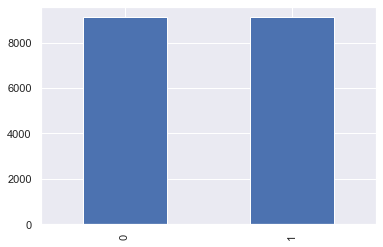

In [15]:
pd.value_counts(df['type_organic']).plot.bar()

In [16]:
#### Observation:We can see that both the types of avacado are almost same in number

#### Trying to Establish All the Co-relation between all columns Using HeatMap

In [17]:
#Finding Co relation for all the columns
cor =df.corr()

<AxesSubplot:>

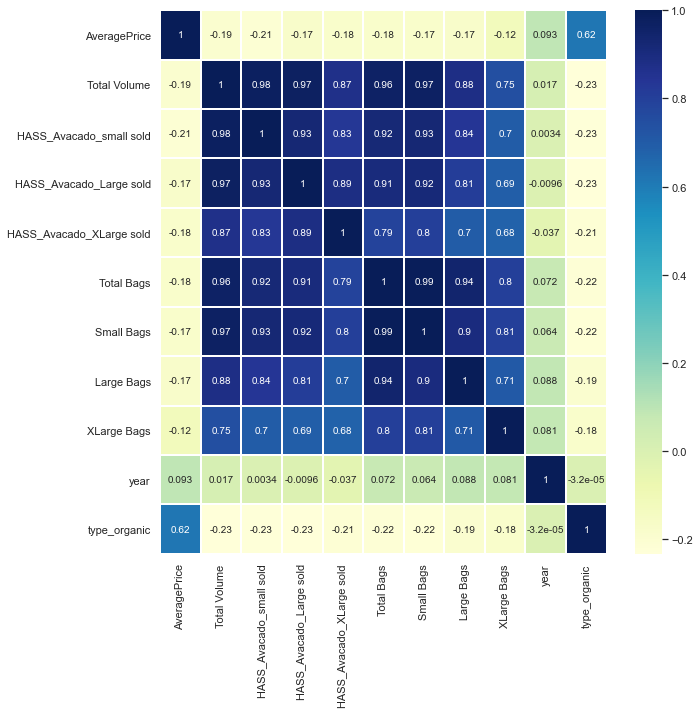

In [18]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cor,annot=True,linewidths=1,linecolor='white',cmap="YlGnBu")

#### Observation: We Can see That Average Price has stronger Co relation with Year and Type of Avacado
There is a high correlation between pairs:

HASS_Avacado_small & Total Volume (0.98)
HASS_Avacado_Large & Total Volume (0.97)
HASS_Avacado_XLarge & Total Volume (0.87)
Total Bags & Total Volume (0.96)
Small Bags & Total Bags (0.99) etc

HASS_Avacado_small avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.

Total Bags variable has a very strong correlation with Total Volume (Total Sales) and Small Bags, so we can conclude that most of the bagged sales comes from the small bags.

#### Applying Lable Encoder on Region Column

In [19]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head(10)

Date  AveragePrice  Total Volume  HASS_Avacado_small sold  \
0  2015-12-27          1.33      64236.62                  1036.74   
1  2015-12-20          1.35      54876.98                   674.28   
2  2015-12-13          0.93     118220.22                   794.70   
3  2015-12-06          1.08      78992.15                  1132.00   
4  2015-11-29          1.28      51039.60                   941.48   
5  2015-11-22          1.26      55979.78                  1184.27   
6  2015-11-15          0.99      83453.76                  1368.92   
7  2015-11-08          0.98     109428.33                   703.75   
8  2015-11-01          1.02      99811.42                  1022.15   
9  2015-10-25          1.07      74338.76                   842.40   

   HASS_Avacado_Large sold  HASS_Avacado_XLarge sold  Total Bags  Small Bags  \
0                 54454.85                     48.16     8696.87     8603.62   
1                 44638.81                     58.33     9505.56     9408.07   
2                109149.67                    130.50     8145.35     8042.21   
3                 71976.41                     72.58     5811.16     5677.40   
4                 43838.39                     75.78     6183.95     5986.26   
5                 48067.99                     43.61     6683.91     6556.47   
6                 73672.72                     93.26     8318.86     8196.81   
7                101815.36                     80.00     6829.22     6266.85   
8                 87315.57                     85.34    11388.36    11104.53   
9                 64757.44                    113.00     8625.92     8061.47   

   Large Bags  XLarge Bags  year  region  type_organic  
0       93.25          0.0  2015       0             0  
1       97.49          0.0  2015       0             0  
2      103.14          0.0  2015       0             0  
3      133.76          0.0  2015       0             0  
4      197.69          0.0  2015       0             0  
5      127.44          0.0  2015       0             0  
6      122.05          0.0  2015       0             0  
7      562.37          0.0  2015       0             0  
8      283.83          0.0  2015       0             0  
9      564.45          0.0  2015       0             0

In [20]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

<AxesSubplot:>

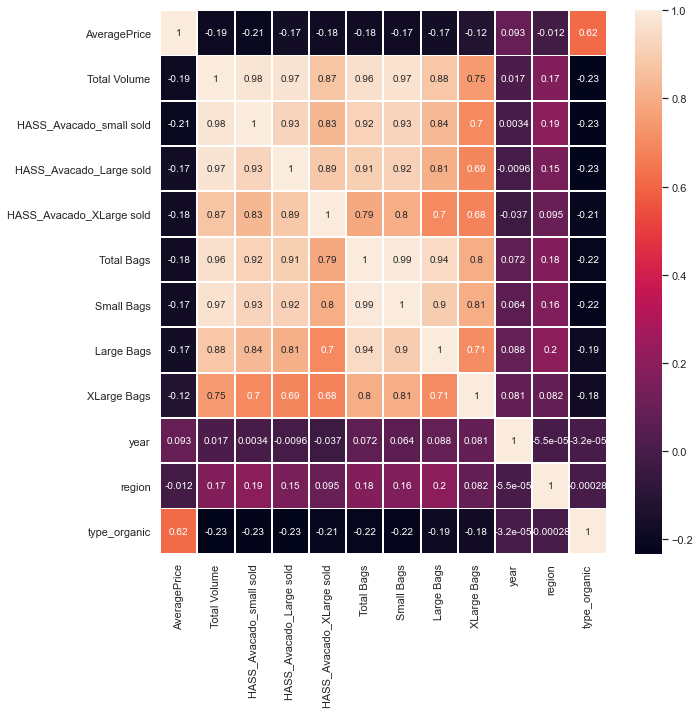

In [21]:
cor =df.corr()
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cor,annot=True,linewidths=1,linecolor='white')

#### Observation:Now we can see some slight co relation between the Average price and Region

### Data Overview Using Pandas Profiling for quick review on EDA

In [22]:
pp.ProfileReport(df)

### 4.Processing the Dataset For Data Analysis 

Starting With Distribution of Average price using displot

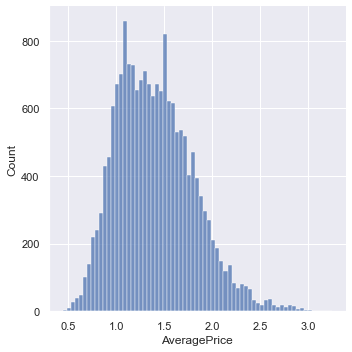

In [23]:
sn.displot(df["AveragePrice"])

#### Observation:Most of the Average Price Lies Range between 0.8-1.6

Price  Variation of Average Price from Various Regions shown using Bar Graph

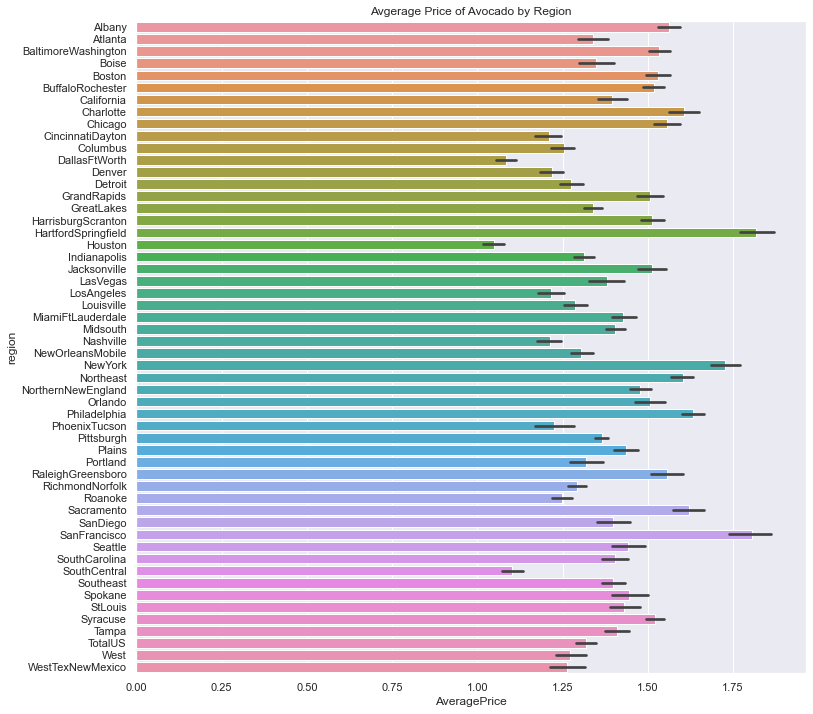

In [24]:
    #using an Alternate Data Frame new_df(Original data frame without Label encoder for meaningFul bar plot)
    plt.figure(figsize=(12,12))
    plt.title("Avgerage Price of Avocado by Region")
    sn.barplot(x="AveragePrice",y="region",data=new_df)
    plt.show()

#### Observation:With HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado, AveragePrice varies with region. Price of avocado varies from one region to another

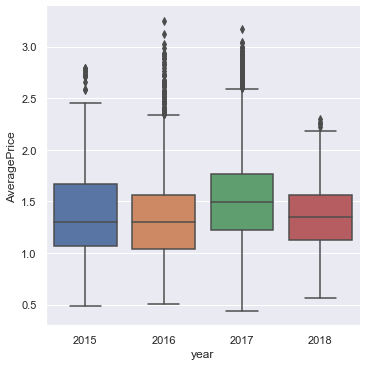

In [25]:
sn.catplot(x="year", y="AveragePrice", kind="box", data=df)

#### Observation:AveragePrice is High in the year 2017 compared to the rest of the years

Using BoxPlot for checking the Average Price Based on the Categories of Avacado

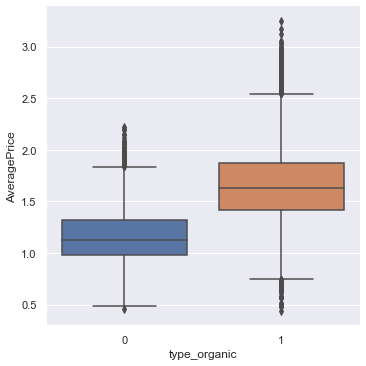

In [26]:
sn.catplot(x="type_organic", y="AveragePrice", kind="box", data=df)

#### Observation:From the above graph we can see that the Average Price for the Organic is More than Conventional ones

###  Predicting Average Price of Avocado

In [27]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'HASS_Avacado_small sold',
       'HASS_Avacado_Large sold', 'HASS_Avacado_XLarge sold', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region',
       'type_organic'],
      dtype='object')

In [28]:
df_full=df[[ 'AveragePrice', 'Total Volume', 'HASS_Avacado_small sold',
       'HASS_Avacado_Large sold', 'HASS_Avacado_XLarge sold', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region',
       'type_organic']]
df_full.head()

AveragePrice  Total Volume  HASS_Avacado_small sold  \
0          1.33      64236.62                  1036.74   
1          1.35      54876.98                   674.28   
2          0.93     118220.22                   794.70   
3          1.08      78992.15                  1132.00   
4          1.28      51039.60                   941.48   

   HASS_Avacado_Large sold  HASS_Avacado_XLarge sold  Total Bags  Small Bags  \
0                 54454.85                     48.16     8696.87     8603.62   
1                 44638.81                     58.33     9505.56     9408.07   
2                109149.67                    130.50     8145.35     8042.21   
3                 71976.41                     72.58     5811.16     5677.40   
4                 43838.39                     75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  year  region  type_organic  
0       93.25          0.0  2015       0             0  
1       97.49          0.0  2015       0             0  
2      103.14          0.0  2015       0             0  
3      133.76          0.0  2015       0             0  
4      197.69          0.0  2015       0             0

#### Feature Scaling

In [29]:
#create x and y variables
X = df_full.drop("AveragePrice", axis=1)
Y = df_full["AveragePrice"].copy()
#transform to array size
#feature scaling
scaler = RobustScaler()
df_full= scaler.fit_transform(df_full.astype(np.float64))

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

In [31]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [32]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 0.31
RMSE of random forest = 0.06
RMSE of decision tree = 0.00


In [33]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 81.91 %
Accuracy of random forest= 97.02 %
Accuracy of decision tree= 100.00 %


In [34]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [35]:
#this is an example of the stored results
results[8]

{'fit_time': array([0.21386218, 0.22387266, 0.1948669 , 0.19288445, 0.1989007 ,
        0.24386191, 0.18688989, 0.19788361, 0.19987893, 0.22384834]),
 'score_time': array([0.00499177, 0.00300288, 0.0039978 , 0.00399542, 0.00600314,
        0.00500059, 0.00400186, 0.00599909, 0.00400019, 0.00499725]),
 'test_score': array([0.68608503, 0.68579268, 0.68754347, 0.64420189, 0.64080546,
        0.70015251, 0.62480329, 0.67503296, 0.58205673, 0.66972437]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [36]:
#This is for Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()

# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [37]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)


Model  RMSE_mean  RMSE_std  MAE_mean   MAE_std   r2_mean  \
1      Random Forest   0.160121  0.001895  0.111142  0.003217  0.841328   
2     Decision Trees   0.234327  0.004256  0.151682  0.005779  0.659620   
0  Linear Regression   0.309889  0.004103  0.237132  0.004175  0.408469   

     r2_std  
1  0.012135  
2  0.034594  
0  0.026371

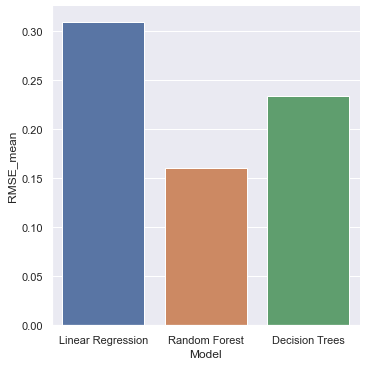

In [38]:
sn.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')

Neither decision tree Nor Linear Regression Model are so good in comparison with the random forest method, both in terms of error and variance explained. The best model is random forest, lets proceed with fine tuning our random forest.

### Fine-tune Random Forest

#### Grid Search

###### In this grid search I will try different combinations of RF hyperparameters.

###### Most important hyperparameters of Random Forest:

###### n_estimators = n of trees
###### max_features = max number of features considered for splitting a node
###### max_depth = max number of levels in each decision tree
###### min_samples_split = min number of data points placed in a node before the node is split
###### min_samples_leaf = min number of data points allowed in a leaf node
###### bootstrap = method for sampling data points (with or without replacement)

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [40]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.19507327992965878 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.19121188451702134 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.19263362359626052 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.18801160330758174 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.16768191173163274 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.16054462329669902 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.16889859586638278 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.16079680524060974 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.16722285701550657 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.16132123628965606 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.17004863959258348 {'bootstrap'

In [41]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=5, n_estimators=25,
                      n_jobs=-1)

In [42]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 100.0 %


In [43]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.0


#### Randomized search

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [46]:
pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [47]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.31658193923787487 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.31657785487306944 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.16677971252026852 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.16926819208107888 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.3173615742908155 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.16013509155136094 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.16034433754852023 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.16477853968282236 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.3174844019937203 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.16603143779031734 {'n_estimators': 110, '

In [49]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, n_jobs=-1)

In [50]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 45}

In [51]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, n_jobs=-1)

Now, lets find out about the performance metrics of our new model: MAPE and RMSE.

In [52]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 96.15 %


In [53]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.08


In conclusion, the metrics for our best models on the training set after our hyperparameter fine-tuning are the following:

Grid-search:
RMSE: 0.0
accuracy (MAPE): 100.0 %
Randomized Search:
RMSE: 0.19
accuracy: 93.06 %
    
This of course does not mean that the randomized search is inherently inferior to  grid-search.
Its just that in this notebook I used the information provided by the former to refine the latter.
In any case, this time I will consider the model obtained by the Grid search as the best one.
First I will plot the feature importance for this model. 
This will give me precious insight to the most important factor in predicting our dependent variable Price. 
Then I will apply the model to the test set.

##### Feature Importance

In [54]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                   feature
0     0.151532              Total Volume
1     0.147704              type_organic
2     0.127047   HASS_Avacado_small sold
3     0.123373                Total Bags
4     0.093330   HASS_Avacado_Large sold
5     0.088076                Large Bags
6     0.080873                Small Bags
7     0.061249                    region
8     0.058221  HASS_Avacado_XLarge sold
9     0.049516                      year
10    0.019079               XLarge Bags


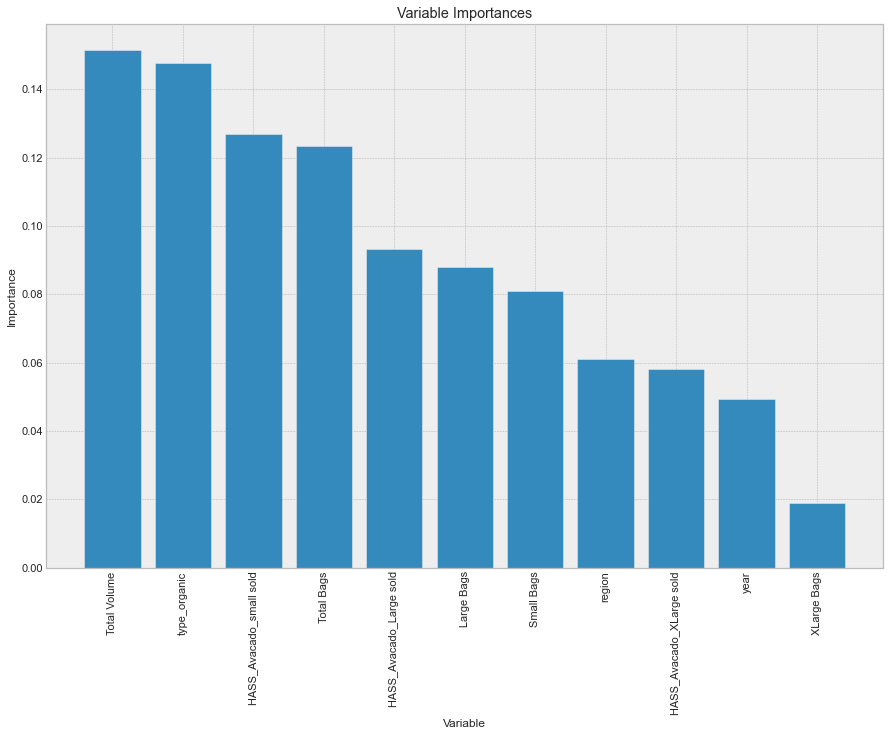

In [55]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Observation:A future aim may be to cut the less relevant features (lets say we can drop large bags in terms of importance),
estimate a new model and compare it with the old ones.
I reckon it would lose predictive power, but on the other hand it would improve in terms of training speed.

###### In conclusion, these are my final considerations on the model:


* The best feature to reliably predict the AveragePrice of a Avacado is Type of Avacado. After Type_of_Avacado that there is a group of 6 features including: HASS_Avacado_small,Total Volume,Total bags large bags and HASS_Avacado_large.

* The features such as region and year are respectively on 8th and 10th in this ranking. XLarge_Bags is the less relevant feature in this cluster.

#### Evaluate best model on the test set

In [56]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.16


In [57]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 91.68 %


### As was to be expected, the performance drops considerably, but is still beyond 90%, which I consider a discrete result.

In [58]:
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(final_model)
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded model to make predictions
y_pred_test_Forestreg=Final_mod_from_pickle.predict(X)
y_pred_test_Forestreg

array([1.270382  , 1.27329179, 1.02503312, ..., 1.77264557, 1.61524171,
       1.60377727])

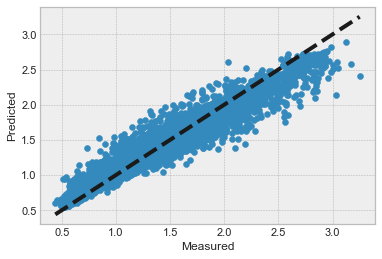

In [59]:
# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validated:
predicted = y_pred_test_Forestreg

fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Conclusion:
#### * Columns like Type of avocado, Year, Region have impact on Average Price
#### * Adding few more columns like bags sold and sales of different avocado types helped in predicting Average price more accurately
#### * The Actual vs Predicted plot clearly indicates the predicted values are almost linear hence performance of model is considerably Good
#### * Random Forest Regressor model predicts the average price more accurately than linear regression model